**0. Importing libraries**

In [ ]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Performs basic imputations when doing preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the imbuilt sclaing functions sklearn provides
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model
from sklearn.metrics import classification_report, accuracy_score
import sklearn.svm 

**1. Data Pre-Processing**

1.1 Loading the dataset and displaying

In [ ]:
# Load the titanic dataset
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')

display(titanic_train)
display(titanic_test)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
645,646,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,C,1
646,647,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,S,0
647,648,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,C,1
648,649,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,S,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,S,0
1,2,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,S,1
2,3,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S,0
3,4,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,Q,1
4,5,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,0
...,...,...,...,...,...,...,...,...,...,...,...
236,237,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
237,238,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
238,239,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
239,240,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


1.2 Cleaning

In [ ]:
#Dropping irrelevant features
titanic_train = titanic_train.drop(columns = ['PassengerId', 'Name','Ticket'], axis=1)
titanic_test = titanic_test.drop(columns = ['PassengerId', 'Name','Ticket'], axis=1)
display(titanic_train)
display(titanic_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Target: Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
645,1,male,48.0,1,0,76.7292,C,1
646,3,male,19.0,0,0,7.8958,S,0
647,1,male,56.0,0,0,35.5000,C,1
648,3,male,NaN,0,0,7.5500,S,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Target: Survived
0,3,male,NaN,0,0,7.8958,S,0
1,2,female,18.0,0,1,23.0000,S,1
2,3,male,21.0,0,0,8.4333,S,0
3,3,female,NaN,0,0,7.8292,Q,1
4,3,female,18.0,0,0,6.7500,Q,0
...,...,...,...,...,...,...,...,...
236,2,male,27.0,0,0,13.0000,S,0
237,1,female,19.0,0,0,30.0000,S,1
238,3,female,NaN,1,2,23.4500,S,0
239,1,male,26.0,0,0,30.0000,C,1


In [ ]:
#Outliers
display(titanic_train.select_dtypes(include=np.number).describe())
display(titanic_test.select_dtypes(include=np.number).describe())

,Pclass,Age,SibSp,Parch,Fare,Target: Survived
count,650.000000,514.000000,650.000000,650.000000,650.000000,650.000000
mean,2.309231,29.875000,0.535385,0.383077,31.450063,0.393846
std,0.837161,14.639321,1.076207,0.804086,45.087844,0.488978
min,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,15.047900,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.646850,1.000000
max,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000


,Pclass,Age,SibSp,Parch,Fare,Target: Survived
count,241.000000,200.000000,241.000000,241.000000,241.000000,241.000000
mean,2.307054,29.247100,0.489627,0.377593,34.238208,0.356846
std,0.834860,14.258735,1.173002,0.813017,60.452153,0.480066
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,19.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,74.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
print(titanic_train[(titanic_train['Fare'] <5 ) | (titanic_train['Fare'] > 400) ])
print(titanic_test[(titanic_test['Fare'] <5 ) | (titanic_test['Fare'] > 400) ])

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Target: Survived
179       3    male  36.0      0      0    0.0000        S                 0
258       1  female  35.0      0      0  512.3292        C                 1
263       1    male  40.0      0      0    0.0000        S                 0
271       3    male  25.0      0      0    0.0000        S                 1
277       2    male   NaN      0      0    0.0000        S                 0
302       3    male  19.0      0      0    0.0000        S                 0
378       3    male  20.0      0      0    4.0125        C                 0
413       2    male   NaN      0      0    0.0000        S                 0
466       2    male   NaN      0      0    0.0000        S                 0
481       2    male   NaN      0      0    0.0000        S                 0
597       3    male  49.0      0      0    0.0000        S                 0
633       1    male   NaN      0      0    0.0000        S                 0

In [ ]:
# Shuffle dataset
rng = np.random.default_rng(0)
df_train = titanic_train.iloc[rng.permutation(len(titanic_train))].reset_index(drop=True)
df_test = titanic_test.iloc[rng.permutation(len(titanic_test))].reset_index(drop=True)
display(df_train)
display(df_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Target: Survived
0,3,male,NaN,0,0,7.8958,S,0
1,3,male,NaN,0,0,15.1000,S,0
2,3,female,NaN,1,0,24.1500,Q,1
3,2,female,17.0,0,0,10.5000,S,1
4,3,female,2.0,3,2,27.9000,S,0
...,...,...,...,...,...,...,...,...
645,3,male,NaN,0,0,7.8958,S,0
646,3,male,NaN,0,0,7.2500,S,0
647,3,female,4.0,0,2,22.0250,S,1
648,1,female,16.0,0,0,86.5000,S,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Target: Survived
0,3,male,44.0,0,0,8.0500,S,0
1,3,male,19.0,0,0,10.1708,S,0
2,1,female,15.0,0,1,211.3375,S,1
3,2,female,48.0,1,2,65.0000,S,1
4,1,male,27.0,1,0,53.1000,S,1
...,...,...,...,...,...,...,...,...
236,1,female,19.0,0,0,30.0000,S,1
237,2,male,25.0,1,2,41.5792,C,0
238,2,male,18.0,0,0,11.5000,S,0
239,3,male,30.0,0,0,7.2292,C,0


In [ ]:
print(df_train['Target: Survived'].value_counts())
print(df_test['Target: Survived'].value_counts())

0    394
1    256
Name: Target: Survived, dtype: int64
0    155
1     86
Name: Target: Survived, dtype: int64


In [ ]:
# Finding the null values.
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Pclass                0
Sex                   0
Age                 136
SibSp                 0
Parch                 0
Fare                  0
Embarked              1
Target: Survived      0
dtype: int64
Pclass               0
Sex                  0
Age                 41
SibSp                0
Parch                0
Fare                 0
Embarked             1
Target: Survived     0
dtype: int64


1.3 Data splitting

In [ ]:
# Separating features from target
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train = df_train[features]
X_test = df_test[features]

y_train = df_train['Target: Survived']
y_test = df_test['Target: Survived']


1.4 Imputation

In [ ]:
# There are a number of missing values in our data - NaNs in both numerical and categorical columns
# To apply the different imputers, we first have to split our data into seperate numerical and categorical data

X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(exclude=np.number)

# Create our imputer objects
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputers on the training data
numeric_imputer.fit(X_train_num)
categorical_imputer.fit(X_train_cat)

# Transform the columns
# Training
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = categorical_imputer.transform(X_train_cat)

#We also need to split and transform our test data
X_test_num = X_test.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(exclude=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp = categorical_imputer.transform(X_test_cat)


1.5 Feature Scaling for numerical features

In [ ]:
# Scaler Object
scaler = StandardScaler()
# Fit on the numeric training data
scaler.fit(X_train_num_imp)
# Transform the training and test data
X_train_num_sca = scaler.transform(X_train_num_imp)
X_test_num_sca = scaler.transform(X_test_num_imp)

1.6 OneHotEncoder for categorical features

In [ ]:
# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit encoder on teh training data
encoder.fit(X_train_cat_imp)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Putting the features back together

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)


**2.  Method 1 - Logistic Regression**

In [ ]:
# Create logistic regression object
obj = LogisticRegression(random_state=0).fit(X_train, y_train)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_log_pred = obj.predict(X_test)

Accuracy: 0.8174
Confusion matrix:  [[0.57261411 0.07053942]
 [0.1120332  0.24481328]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       155
           1       0.78      0.69      0.73        86

    accuracy                           0.82       241
   macro avg       0.81      0.79      0.80       241
weighted avg       0.81      0.82      0.81       241



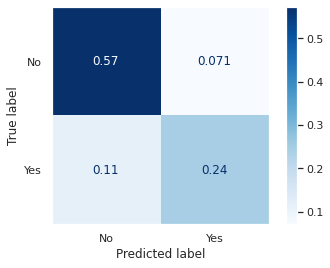

In [ ]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_log_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_log_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['No', 'Yes']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_log_pred))

**2. Method 2 - SVM**

In [ ]:
# Create support vector classifier object
obj = sklearn.svm.SVC(C=1,kernel='rbf',random_state=40)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_svm_pred = obj.predict(X_test)

print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       155
           1       0.82      0.74      0.78        86

    accuracy                           0.85       241
   macro avg       0.84      0.83      0.83       241
weighted avg       0.85      0.85      0.85       241



Accuracy: 0.8506
Confusion matrix:  [[0.58506224 0.05809129]
 [0.09128631 0.26556017]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       155
           1       0.82      0.74      0.78        86

    accuracy                           0.85       241
   macro avg       0.84      0.83      0.83       241
weighted avg       0.85      0.85      0.85       241



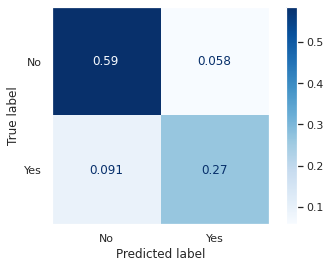

In [ ]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_svm_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_svm_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['No', 'Yes']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_svm_pred))

**4.Comparing the models**

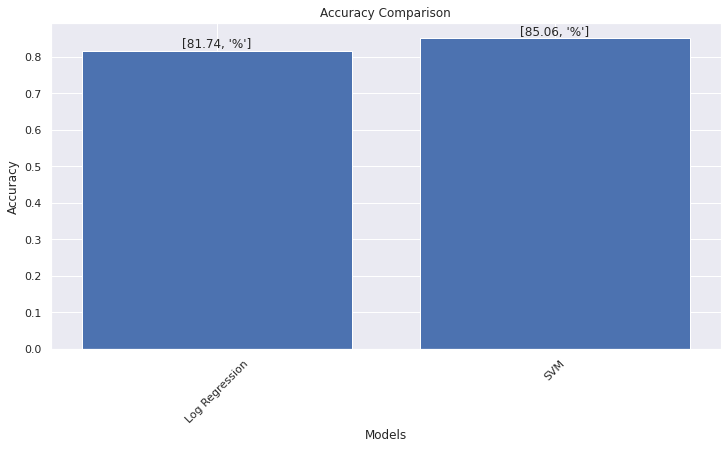

In [ ]:
log_acc = accuracy_score(y_test, y_log_pred)
svm_acc = accuracy_score(y_test, y_svm_pred)

# Comparing Model Scores

fig, ax = plt.subplots(figsize=(12,6))

models = ["Log Regression","SVM" ]
accuracies = [log_acc, svm_acc]
ax.bar(models, accuracies)
plt.xticks(rotation=45)
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
for i in range(len(models)):
    ax.text(i, accuracies[i], [(accuracies[i]*100).round(2), "%"], ha="center", va="bottom")
plt.rcParams.update({'font.size': 14})
plt.show()

In [ ]:
# Model tuning for logistic regression
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = [ 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid3 = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = RandomizedSearchCV(LogisticRegression(),grid3,n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

# Print the best parameters
print("Best:", grid_search.best_params_)

# Evaluate the model's accuracy on the test data
accuracy_log_tuning = grid_search.score(X_test, y_test)

print("Accuracy Before Model Tuning: {:.2f}%".format(log_acc * 100))
print("Accuracy After Model Tuning: {:.2f}%".format(accuracy_log_tuning * 100))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=100)
Best: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Accuracy Before Model Tuning: 81.74%
Accuracy After Model Tuning: 81.74%


In [ ]:
# Model tuning for SVM
param_grid2 = {'C': (0.01, 0.1, 1, 10, 100),
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'class_weight': ('balanced', None),
              'gamma' : ('scale', 'auto'),
              'shrinking': (True, False)}

grid = RandomizedSearchCV(sklearn.svm.SVC(),param_grid2,n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)


# Print the best parameters
print("Best:", grid.best_params_)

# Evaluate the model's accuracy on the test data
accuracy_svm_tuning = grid.score(X_test, y_test)

print("Accuracy Before Model Tuning: {:.2f}%".format(svm_acc * 100))
print("Accuracy After Model Tuning: {:.2f}%".format(accuracy_svm_tuning * 100))

Best: {'shrinking': False, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 1}
Accuracy Before Model Tuning: 85.06%
Accuracy After Model Tuning: 84.65%
